## **Lab Activity #2: COVID and Markov Chains**


Submitted by:\
IMPERIAL, Austin Gomez\
MANINANG, Enika Aubrey\
VILLADAREZ, Luis Gabriel\
YAPAN, Miguel Carlo

Date: 03-15-22

## **Problem 1**

The state space transition diagram of matrix A was made using Lucidchart. The states were labeled $S_n$. The variable $n$ refers to the number of the state in matrix A, thus $1 \leq n \leq 9$. It can be accessed via this link: https://drive.google.com/file/d/1OZy9c_qZQaHqcG_VxSYOqi0rECIff85t/view?usp=sharing

(1) Arrival to Campus and Covid-19 testing; \
(2) Infected students go into Isolation units; \
(3) Some students are placed in face to face courses; \
(4) Other students are placed in online courses; \
(5) Some students who violated Code are placed in Suspension; \
(6) Some students become infected with Covid-19, but are not detected; \
(7) Some students violate code but are not detected; \
(8) Absorption: Some students are Expelled from College; \
(9) Absorption: Other students Complete their Semester  

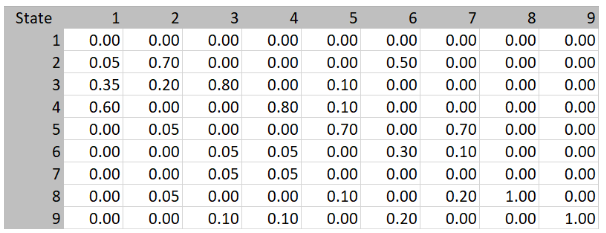

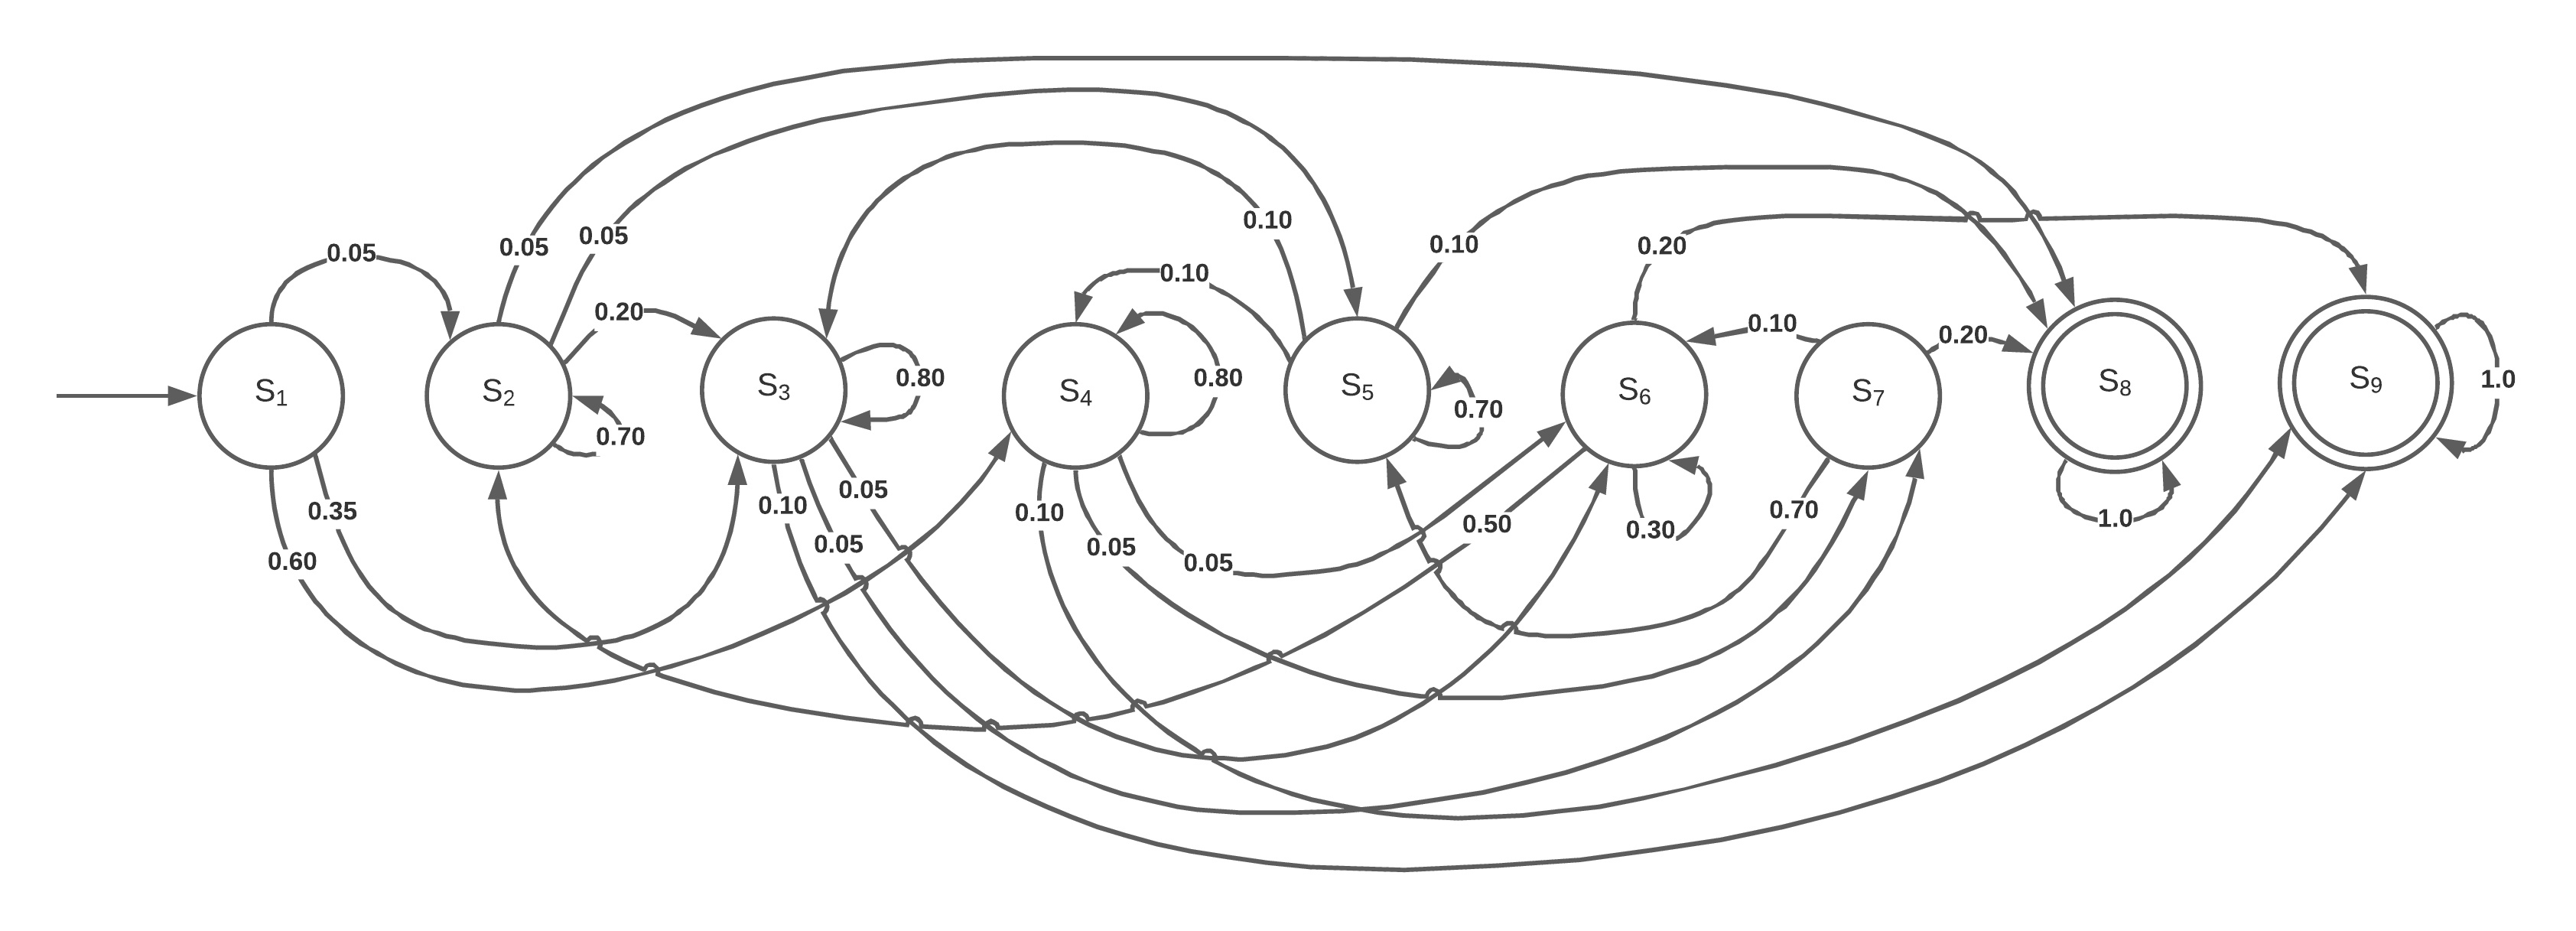

## **Problem 2**

We first imported the `MarkovChain` class from our module. We modified it so that it generates a new attribute `S` that refers to the inverse of `I-A`. To do this, we made use of the `linalg.inv()` and `identity` functions of `numpy`, which take the inverse of a matrix and create an identity matrix, respectively. 

The `get` method returns the specific column in the new matrix `S` that corresponds to the state fed to the input.

The `get_state` method returns the index of the state indicated in the input.

The `get_S` method returns the `S` matrix generated by our class.

The last block defines the 7x7 submatrix `A` taken from the given transient states and the list of labels, 1 to 7, labelled `substates` and assigned them to our `MarkovChainLab` object education.

In [1]:
#Import pertinent libraries
import numpy as np

class MarkovChainLab:
    def __init__(self, matrix, states=None):
        #the following lines of code verify that the matrix is column stochastic by adding the entries in each column.
        for i in range(0,len(matrix[0])):
            if sum(matrix[:,0]) > 1:
                raise ValueError('Matrix is not column stochastic.')
        self.A = matrix
        #the following lines of code set a the default [0 1 2 ... N-1] for the states.
        if states == None:
            self.states = [i for i in range(0,len(matrix))]
        else:
            self.states = states
        #the following line creates a dictionary of states to their indexes in the matrix.
        self.map = {self.states[i]:i for i in range(0,len(matrix))}
        #the following line creates our S attribute, which is the inverse of I-A.
        self.S = np.linalg.inv(np.identity(len(matrix))-self.A)
    
    def get(self, state):
        index = self.map.get(state)
        column = self.S[:, index]
        output = print('The index of the input state is', index, 'and the column in S that corresponds to this state is', column)
        return output
        
    def get_state(self, state):
        return self.map.get(state)

    def get_S(self):
        return self.S

    #The following methods are just nice-to-haves taken from our module.

    def nextstate(self, state):
        #nextstate is a method that guesses the next state by passing the probabilities in the column of the initial state to the np.random.multinomial function.
        index = self.map[state]
        probability = self.A[:, index]
        draws = np.random.multinomial(1, probability) 
        stateindex = np.argmax(draws)
        return self.states[stateindex]
    
    def walk(self, state, N):
        #walk lists down N states from your input to the next N-1 states.
        #walk is basically nextstate iterated multiple times.
        currentstate = [state]
        for i in range(0, N-1):
            index = self.map[currentstate[i]]
            probability = self.A[:, index]
            draws = np.random.multinomial(1, probability)
            nextstateindex = np.argmax(draws)
            currentstate.append(self.states[nextstateindex])
        return currentstate
   
    def path(self, initstate, endstate):
        #path lists down states until your specified endstate.
        #the code is similar to walk, but it instead checks if the current state matches the end state.
        currentstate = [initstate]
        i=0
        while currentstate[len(currentstate)-1] != endstate: 
            index = self.map[currentstate[i]]
            probability = self.A[:, index]
            draws = np.random.multinomial(1, probability)
            nextstateindex = np.argmax(draws)
            currentstate.append(self.states[nextstateindex])
            i += 1
        return currentstate
        
    def sdvector(self, initstate, N):
        #sdvector shows the state distribution vector of the (N+1)th state given an initial state.   
        #note that a the probability matrix is a square matrix with row and column equal to x, x is a positive integer.
        #in order to take the (N+1)th state distribution vector, we need to build a vector similar to [[0],[0],...,[1],...,[0]], which we'll call the initial vector or initvector. 
        #in the initvector, there there are x-1 zeroes and 1 one that is placed in the index of our input initial state.
        #the following lines of code build this vector.
        index = self.map[initstate]
        initlist = []
        for i in range(0, len(self.A)):
            initlist.append([0])
        initlist[index] = [1]
        initvector = np.array(initlist)
        #the following just converts our array to a matrix and then does the multiplication stated previously.
        matrix = np.matrix(self.A)
        return (matrix**(N))*initvector

In [2]:
#We first assign the 7x7 submatrix of all transient states to A
A = np.array([[0,0,0,0,0,0,0],[0.05,0.7,0,0,0,0.5,0],[0.35,0.2,0.8,0,0.1,0,0],[0.6,0,0,0.8,0.1,0,0],[0,0.05,0,0,0.7,0,0.7],[0,0,0.05,0.05,0,0.3,0.1],[0,0,0.05,0.05,0,0,0]])

#We create a list of states, numbered from 1 to 7, for the submatrix A
substates = [i for i in range(1,8)]

#We then initialize a MarkovChainLab class called education and pass the matrix A and the list of states
education = MarkovChainLab(A, substates)

## **Problem 3**

We create a 2x7 matrix `B` that was defined in our prompt. We then multiply it with `education.S`, which was initialized previously. We used the `np.matrix` function from `numpy` to make sure that the multiplication between `B` and `education.S` is a matrix multiplication.

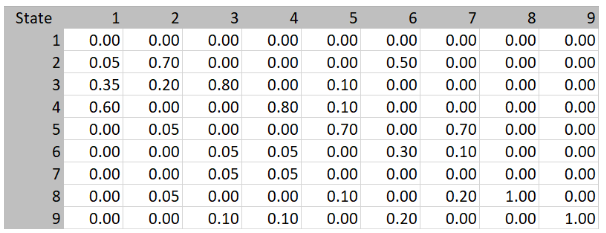

In [3]:
#We define matrix B for problem 3.
B = np.array([[0,0.05,0,0,0.1,0,0.2],[0,0,0.1,0.1,0,0.2,0]])

#We multiply matrix S from education and the previously-defined submatrix B and assign it to G.
G = np.matrix(100*(np.matrix(B)*np.matrix(education.S))).round(2)
print(G)

expulsion_mean = round((G[0].sum()/len(G[0])),2)
completion_mean = round((G[1].sum()/len(G[1])),2)

print(expulsion_mean)
print(completion_mean)

[[21.68 38.4  20.8  20.8  47.2  27.43 55.78]
 [78.32 61.6  79.2  79.2  52.8  72.57 44.22]]
33.16
66.84


## **Problem 4**

We now wrap up the lab — we have the matrix `G`, which refers to the probability of a student going to each of the two absorption state given their initial state. But, what does this mean?

The resulting matrix `G` shows that generally, the probability of Coursework Completion (66.84%) is still relatively greater than the probability of Expulsion (33.16%). These two probabilities are taken from the average of the students completing their coursework or getting expelled from each state. 

We cannot exactly compare the generated expulsion and completion probability with that of past data or data from when the school had a fully physical setup, since it was not given. so we cannot really say for sure whether or not the 2:1 ratio between completion and expulsion is a good measure.

Notice that there is an equal probability of a student either completing their coursework or getting expelled for those who underwent both face-to-face and online classes (States 3 and 4). This implies that there is little difference between the two setups, but we cannot establish this for sure as it's more or less just an observation and no other factors were included. Furthermore, coming from State 1, only 35% of the students were placed in face-to-face classes while 60% of the students were placed in online courses, so the number of students who will complete the course and get expelled from the two setups are different.

Compared to the average risk of expulsion, there is still a relatively higher risk of expulsion in States 5 and 7 (47.2% and 55.78% respectively). However, since their probabilities are not significantly far from the odds of Coursework Completion, the school can resort to a more constant and stricter, if necessary, reminding of the Code. Furthermore, the high probability of undetected violations that result to Coursework Completion (72.57%) should urge colleges to invest in a better COVID monitoring system campus-wide. Consequently, colleges should prioritize better health and isolation facilities to better care for infected students and lower the chances of expulsion due to early infection.

Overall, the simulated results shows that the re-opening of colleges during the COVID-19 pandemic is still feasible but this comes with the imperative implication of better implementation of the Code and health monitoring systems. It would be good to slowly introduce students to campus with pilot testing, so that the school's systems will be okay as they implement full face-to-face classes.

To add further insight, the code below simulates what would happen if we reduce the number of students taking a face-to-face course and transfer them to an online setup (from 0.35 to 0.05 and from 0.6 to 0.9). Notice that there is no change in both the probability of them completing their coursework and getting expelled, so the problem really lies with the school's monitoring system and enforcing of the code.

In [4]:
A = np.array([[0,0,0,0,0,0,0],[0.05,0.7,0,0,0,0.5,0],[0.05,0.2,0.8,0,0.1,0,0],[0.9,0,0,0.8,0.1,0,0],[0,0.05,0,0,0.7,0,0.7],[0,0,0.05,0.05,0,0.3,0.1],[0,0,0.05,0.05,0,0,0]])

substates = [i for i in range(1,8)]

education = MarkovChainLab(A, substates)

B = np.array([[0,0.05,0,0,0.1,0,0.2],[0,0,0.1,0.1,0,0.2,0]])

G = np.matrix(100*(np.matrix(B)*np.matrix(education.S))).round(2)
print(G)

expulsion_mean = round((G[0].sum()/len(G[0])),2)
completion_mean = round((G[1].sum()/len(G[1])),2)

print(expulsion_mean)
print(completion_mean)

[[21.68 38.4  20.8  20.8  47.2  27.43 55.78]
 [78.32 61.6  79.2  79.2  52.8  72.57 44.22]]
33.16
66.84


In [23]:
print(education.S)
round(education.S[:,6].sum(),0)

[[1.         0.         0.         0.         0.         0.
  0.        ]
 [1.05296035 4.03041825 0.89625204 0.89625204 0.59750136 2.87887018
  0.70613797]
 [2.23255024 0.64638783 5.47392721 0.47392721 1.98261814 0.46170559
  1.43400326]
 [4.53551059 4.67680608 1.37017925 6.37017925 2.5801195  3.34057577
  2.14014123]
 [0.96510049 1.29277567 0.94785443 0.94785443 3.96523628 0.92341119
  2.86800652]
 [0.53177621 0.41825095 0.53775122 0.53775122 0.35850081 1.72732211
  0.42368278]
 [0.33840304 0.2661597  0.34220532 0.34220532 0.22813688 0.19011407
  1.17870722]]


9.0